# Predicting Credit Card Fraud using machine learning

I am going to take the following approach:
1. Define the problem
2. ETL and Data preprocessing
3. Features 
4. Modelling
5. Evaluation
6. Features importance
7. Saving the model

## 1. Defining the Problem
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## 2. Data 
The original dataset came from Kaggle.com. Follow the link for futher details:https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## 3.Evaluation

> If we can reach 95% accuarcy for predicting weather a transactions is fraudulent or not, we will pursue the project.

## 4. Feartures
* There is a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28), which means there will be no feature engineering.


### Dependencies for the following project:

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset into a PandasDataframe


In [3]:
credit = pd.read_csv("C:/Users/alwee/OneDrive/Desktop/Credit Card Fraud/creditcard.csv ")
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Exploratory data analysis and data prepocessing

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

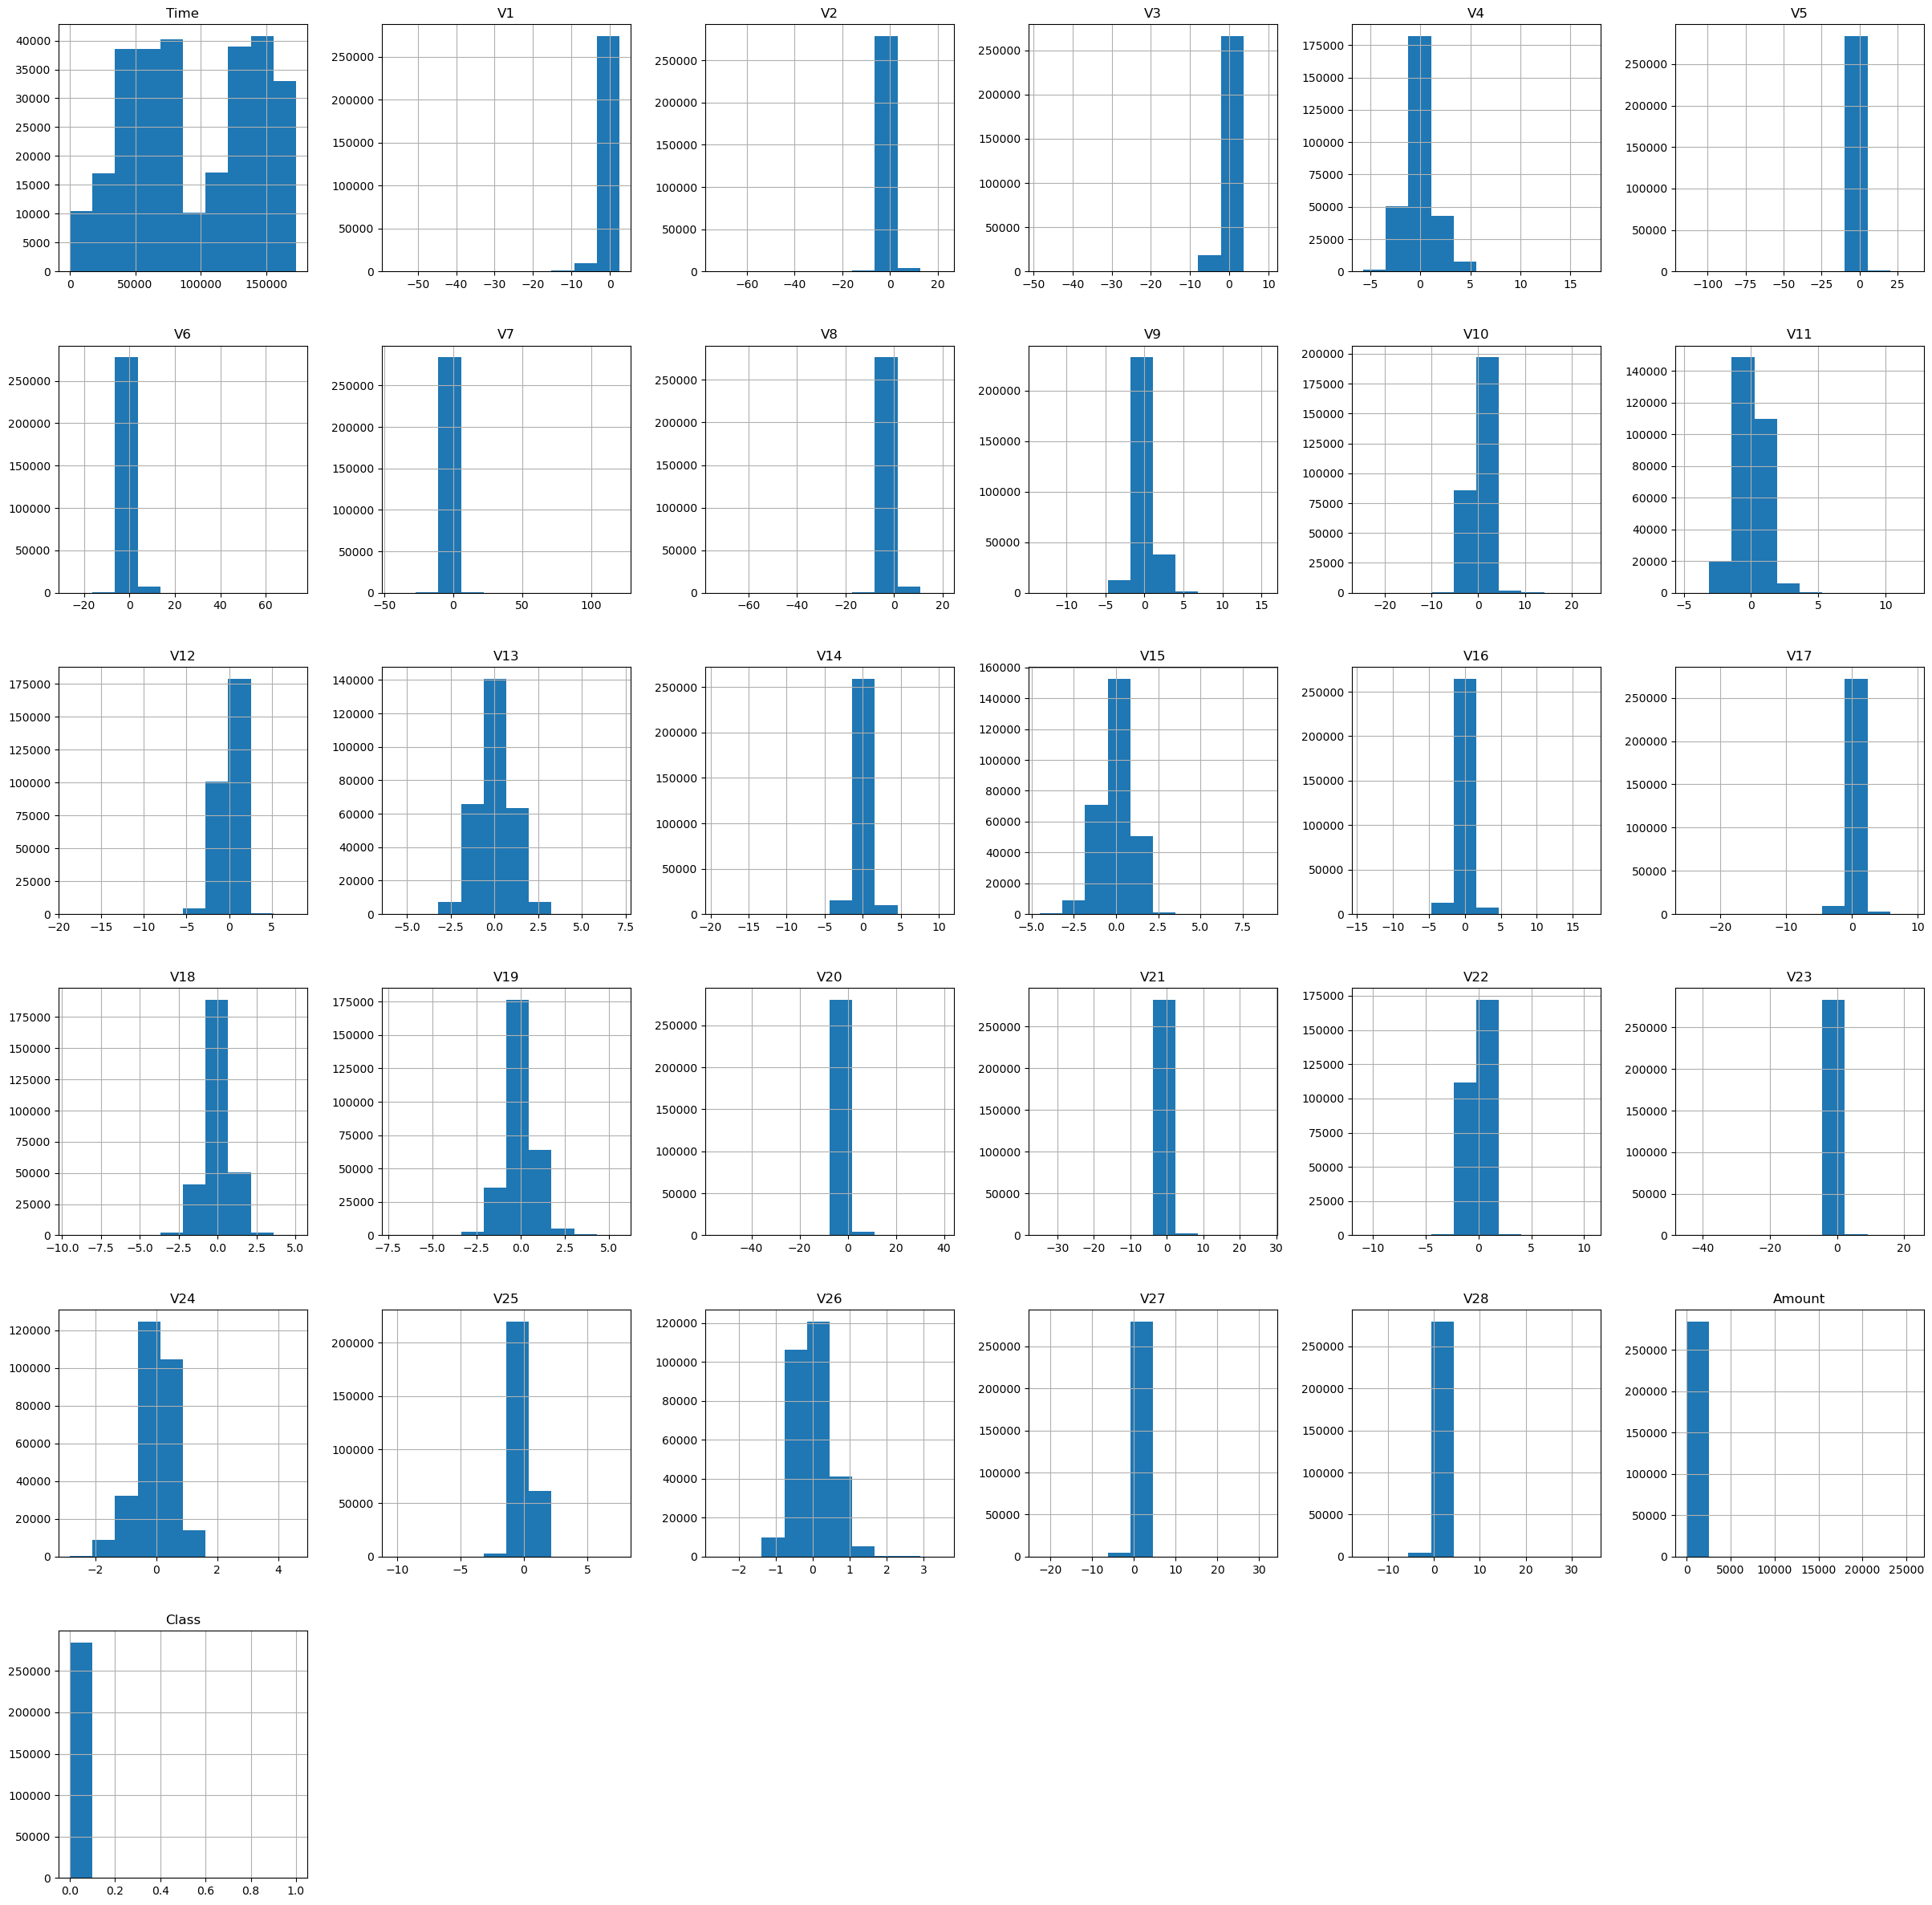

In [4]:
credit.hist(figsize =(30,30))

In [14]:
credit["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
credit['Time'] = pd.to_datetime(credit['Time'], unit='s')
credit['Minutes'] = credit["Time"].dt.strftime('%M')


In [30]:
credit.head()
credit.drop("Time", axis =1,inplace =True)

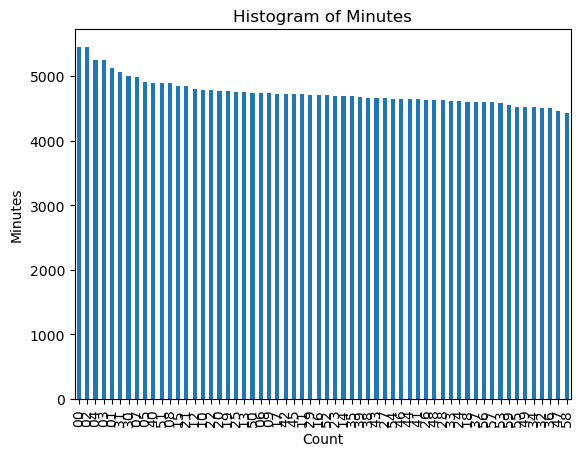

In [31]:
credit['Minutes'].value_counts().plot(kind='bar')

plt.xlabel('Count')
plt.ylabel('Minutes')
plt.title('Histogram of Minutes')
plt.show()

C:\Users\alwee\AppData\Local\Temp\ipykernel_20988\2881692005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_credit.corr()


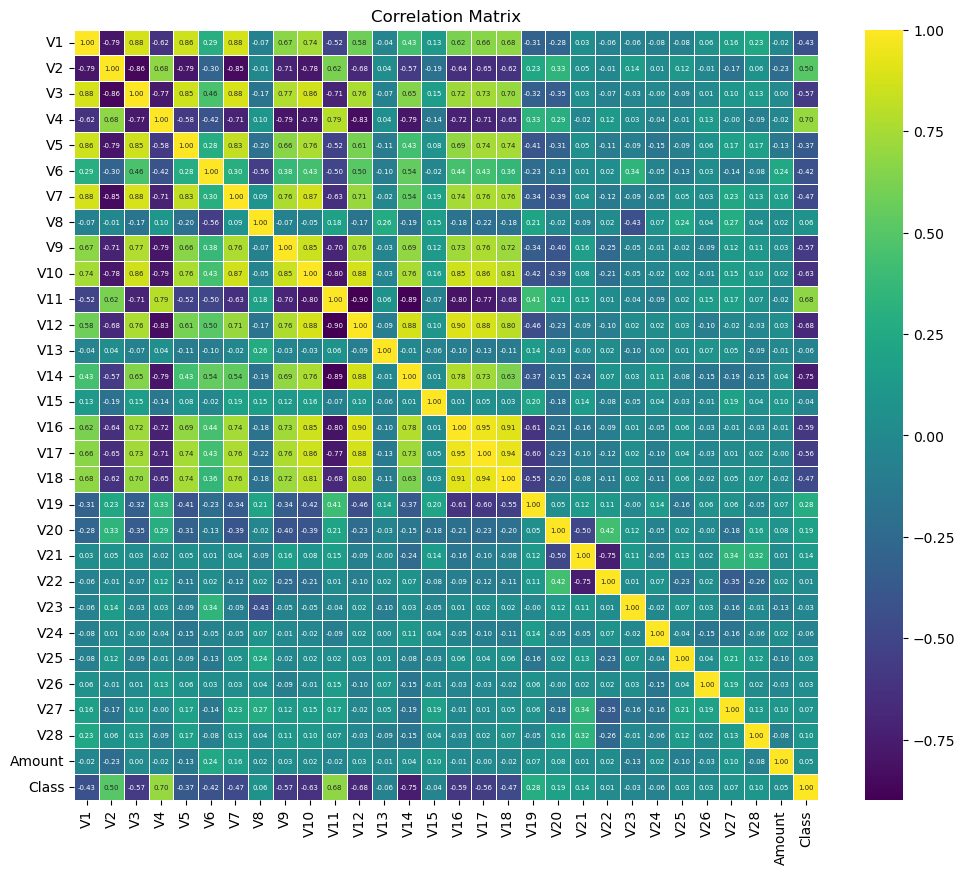

In [59]:
corr_matrix = new_credit.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5,annot_kws={"size": 5})
plt.title('Correlation Matrix')
plt.show()

#### I could only transform the "Time" feature because Kaggle.com states that there is a PCA Dimensionality reduction to protect user identities and sensitive information for features(v1-v28)

##  This is an unbalanced dataset. In order tackle this issue, we will have create a sample of the legit transactions which has the number of transactions as the fraudulent transactions.

In [32]:
legit= credit[credit.Class == 0]
fraud= credit[credit.Class != 0]

In [33]:
legit.shape

(284315, 32)

In [34]:
fraud.shape

(492, 32)

In [35]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [36]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [37]:
credit.groupby("Class").mean()

C:\Users\alwee\AppData\Local\Temp\ipykernel_20988\4160134306.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credit.groupby("Class").mean()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Under Sampling
Now i am going to build a  sample dataset containing a similar distributin of normal transactions and Fraudulent Transactions

In [38]:
legit_sample = legit.sample(n=492)

In [39]:
new_credit = pd.concat([legit_sample, fraud], axis =0)
new_credit

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,time_formatted,Minutes
268442,1.948807,-0.079712,-1.752111,0.622522,0.371225,-0.563901,0.127033,-0.221040,0.691624,-0.570619,...,0.015309,0.596032,0.123816,0.606931,-0.051034,-0.023203,54.95,0,20,20
109700,1.238513,0.076749,0.002528,0.190348,0.306954,0.468887,-0.144592,0.163405,-0.110362,0.062093,...,0.003459,-1.159307,0.260419,0.178883,-0.020915,-0.005219,10.99,0,51,51
232919,2.048022,-0.092159,-1.201671,0.206100,0.126191,-0.660301,0.089107,-0.176497,0.272103,0.235878,...,0.277105,-0.399975,-0.268090,0.201907,-0.073390,-0.073640,1.29,0,56,56
180662,-1.057104,0.983058,-0.483085,-0.497620,-0.216537,-0.719037,1.473949,0.085000,-0.051411,-1.994197,...,0.067475,-0.159985,-0.114293,-0.131611,-0.031480,0.066002,194.78,0,37,37
41685,-0.859260,1.233486,0.379515,0.705203,-0.069204,0.074911,0.010222,0.566943,-0.285549,0.361953,...,-0.036729,-0.357244,-0.320441,-0.378865,-0.892802,-0.563634,1.50,0,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,59,59
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,02,02
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,02,02
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,12,12


In [40]:
new_credit.groupby("Class").mean()

C:\Users\alwee\AppData\Local\Temp\ipykernel_20988\2385410923.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_credit.groupby("Class").mean()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.043597,-0.060236,0.014243,0.092210,-0.034974,0.104429,-0.013817,-0.022051,0.053213,-0.041544,...,-0.030181,-0.049853,0.000054,0.017771,-0.037988,0.002932,0.024842,0.018127,-0.029723,98.080935
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [41]:
### Splittiing the Dataset and training 
X = new_credit.drop("Class", axis =1)
y = new_credit["Class"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, stratify =y, random_state =2)

model = LogisticRegression()
model.fit(X_train,y_train)



C:\Users\alwee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
X_train_prediction = model.predict(X_train)
acc_score = accuracy_score(X_train_prediction, y_train)

In [43]:
acc_score

0.9593392630241423

In [46]:
y_preds = model.predict(X_test)
accT_score = accuracy_score(y_preds,y_test)
accT_score

0.9137055837563451

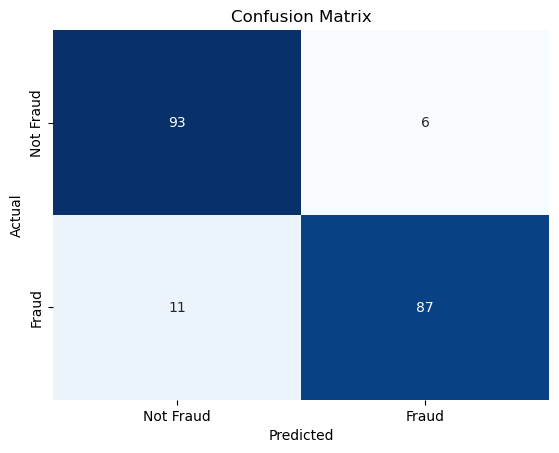

In [60]:
conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
accuracy = accuracy_score(y_test, y_preds)
class_report = classification_report(y_test, y_preds)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9137055837563451
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        99
           1       0.94      0.89      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



## Feature Importance

In [63]:
feature_dict = dict(zip(new_credit.columns,list(model.coef_[0])))
feature_dict

{'V1': 0.14121738892816943,
 'V2': -0.4250167484404216,
 'V3': 0.02312129374223626,
 'V4': 0.9762598062231778,
 'V5': 0.2239188416936626,
 'V6': -0.5115622325615046,
 'V7': 0.22252018217628777,
 'V8': -0.7746223380279771,
 'V9': -0.4982216651587866,
 'V10': -0.7972717469787871,
 'V11': 0.5782788986691119,
 'V12': -1.0073718877491151,
 'V13': -0.31924364863070226,
 'V14': -1.650057175072931,
 'V15': 0.027245088937859374,
 'V16': -0.40317918920969825,
 'V17': -0.9841456836930926,
 'V18': -0.2985847951528501,
 'V19': 0.2741963749950284,
 'V20': 0.10614924207230325,
 'V21': -0.07840600315235173,
 'V22': 0.26603973998260716,
 'V23': -0.3589600152214938,
 'V24': 0.3788496577944581,
 'V25': -0.3354128694427719,
 'V26': -0.6368694058585328,
 'V27': 0.21550412458710308,
 'V28': 0.9402579906600491,
 'Amount': -6.440370646254351e-05,
 'Class': 0.008645256375011307,
 'time_formatted': 0.008645256375011307}

<Axes: title={'center': 'Feature importance'}>

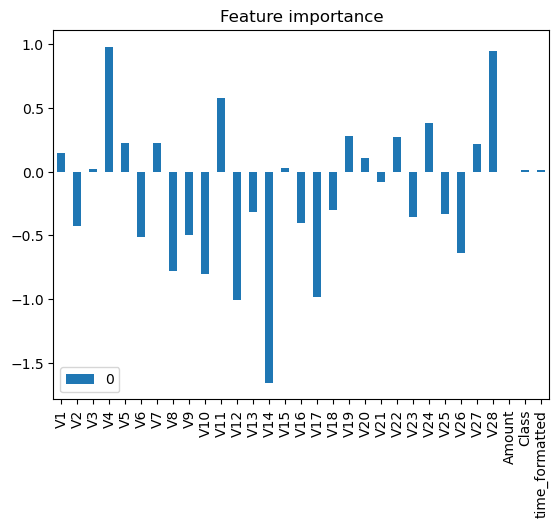

In [64]:
feature_credit = pd.DataFrame(feature_dict, index=[0])
feature_credit.T.plot.bar(title ="Feature importance")

In [65]:
import joblib
joblib.dump(model, 'fraud_detection_model.joblib')


['fraud_detection_model.joblib']

In [66]:
#### To load the model for future use and predictions


loaded_model = joblib.load('fraud_detection_model.joblib')

# Make predictions using the loaded model
predictions = loaded_model.predict(X_test)